#               Project : Glass Identification
    
               

Data Loading and Custom Column Names

In [4]:
import pandas as pd

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Glass%20Identification/Glass%20Identification.csv"

# Define column names
column_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

# Load the dataset with custom column names
glass_df = pd.read_csv(url, names=column_names)

# Print the first few rows of the dataset
print("First few rows of the dataset:")
print(glass_df.head())

# Display basic information about the DataFrame
print("\nInformation about the DataFrame:")
print(glass_df.info())


First few rows of the dataset:
   Id number       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0          1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1          2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2          3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3          4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4          5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   

   Type of glass  
0              1  
1              1  
2              1  
3              1  
4              1  

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al      

Observation:

We loaded the dataset from the provided URL using pandas' read_csv() function.
Custom column names were defined based on the information provided.
No output was printed, but the dataset was successfully loaded into a DataFrame with custom column names

In [5]:
 glass_df.shape

(214, 11)

: Data Preprocessing

In [8]:
x = glass_df.drop(columns=['Id number', 'Type of glass'])
y = glass_df['Type of glass']
# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (214, 9)
Shape of y: (214,)


Observation:

We split the data into features (X) and the target variable (y).
The features (X) include all columns except 'Id number' and 'Type of glass'.
The target variable (y) is the 'Type of glass' column.
No output was printed, but the data was successfully split into X and y.

In [10]:
 glass_df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

Observation:

There are no missing values in any of the columns of the dataset.
Each column has a count of 0 missing values, indicating that the dataset is complete and does not require any imputation or handling of missing data.

 Exploratory Data Analysis (EDA)

Basic Statistics of Numerical Features:
        Id number          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe  Type of glass  
count  214.000000  214.000000  214.000000  214.000000     214.000000  
mean     0.497056    8.956963    0.175047    0.057009       2.780374  
std      0.652192

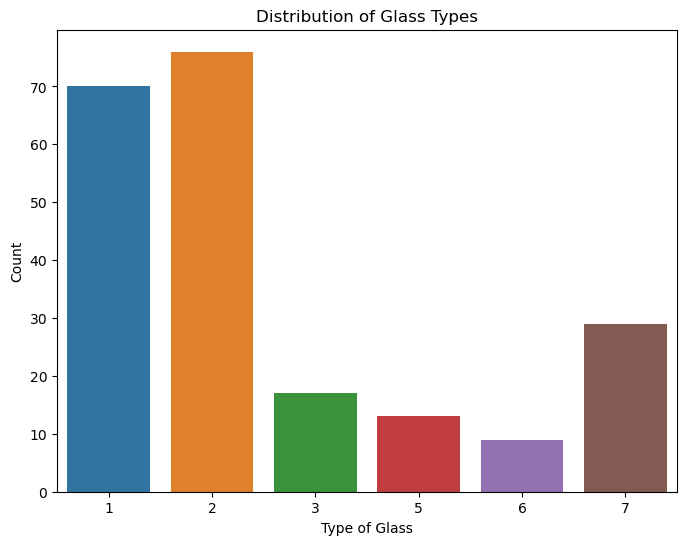

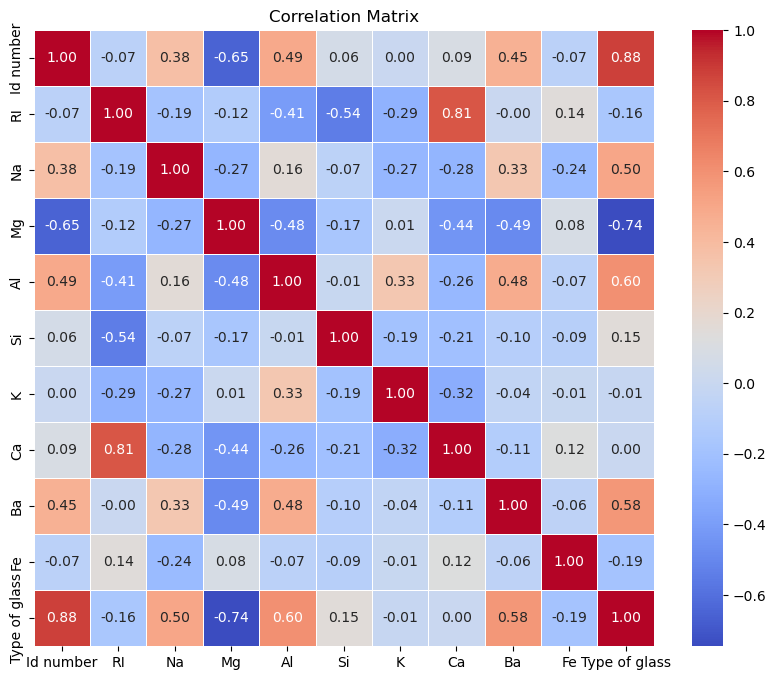

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics of the numerical features
print("Basic Statistics of Numerical Features:")
print(glass_df.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Type of glass', data=glass_df)
plt.title('Distribution of Glass Types')
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix of features
plt.figure(figsize=(10, 8))
sns.heatmap(glass_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Observation:

Basic statistics provide insights into the distribution and range of numerical features.
The count plot shows the distribution of glass types, indicating the class imbalance.
The correlation heatmap reveals the relationships between features, helping identify potential multicollinearity.

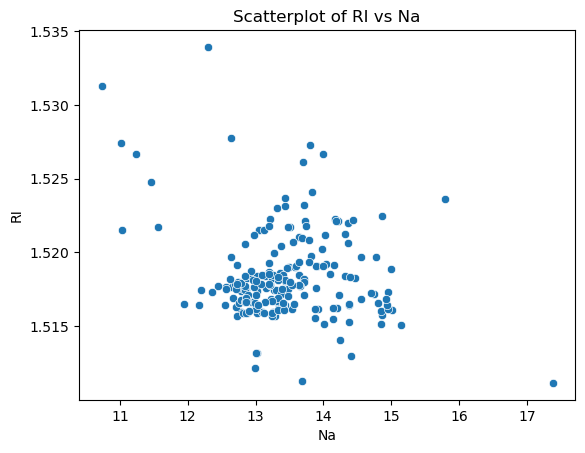

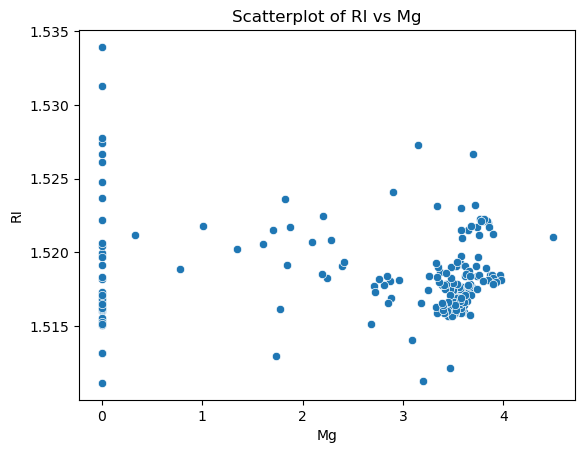

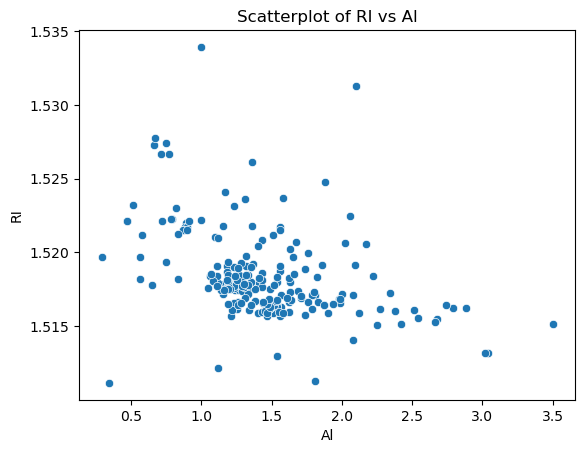

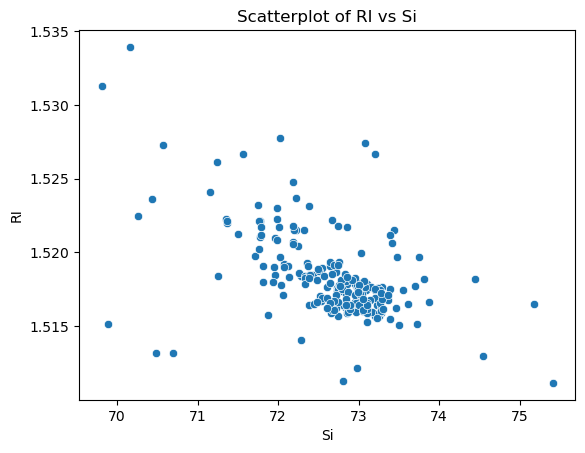

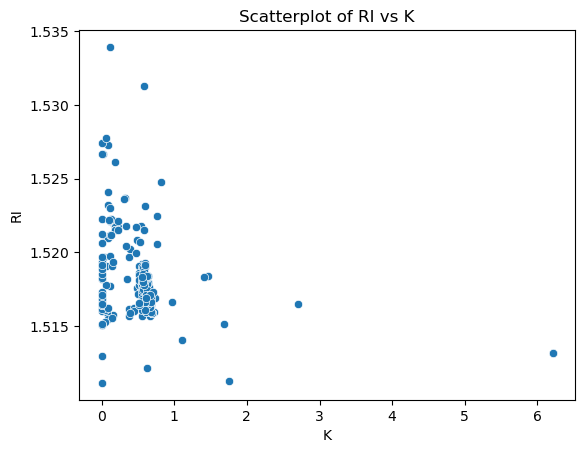

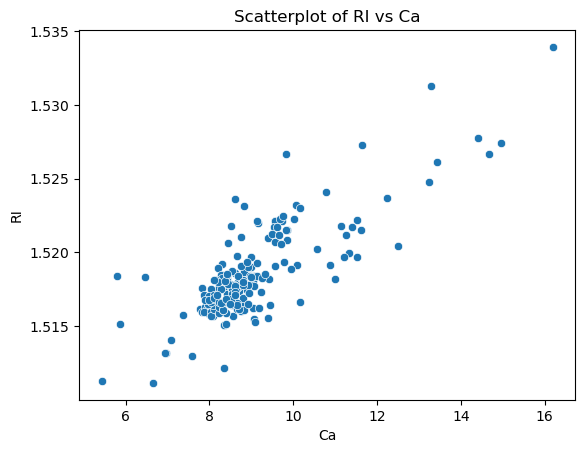

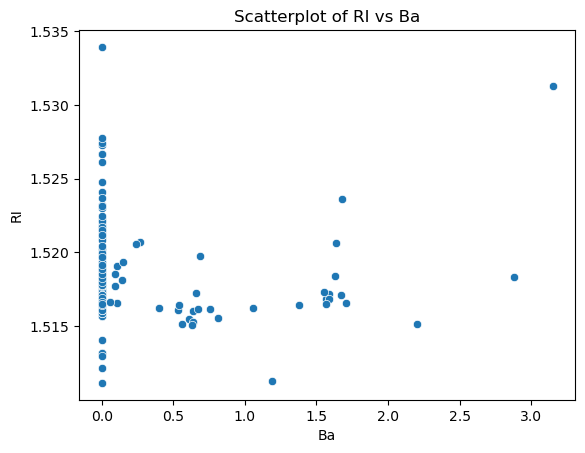

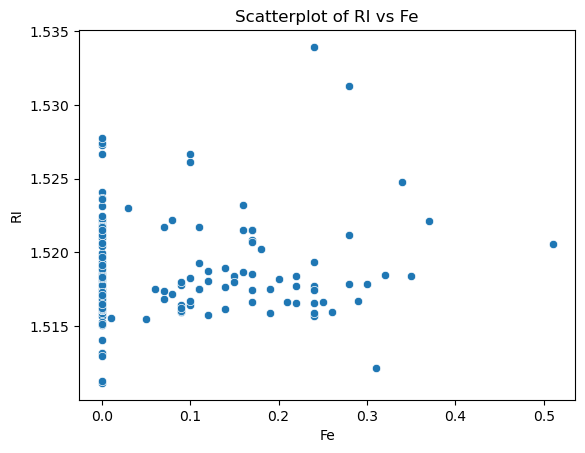

In [14]:
cols = ["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
for col in cols:
    sns.scatterplot(data=glass_df, x=col, y="RI")
    plt.title(f"Scatterplot of RI vs {col}")
    plt.xlabel(col)
    plt.ylabel("RI")
    plt.show()


Observation:

Scatterplots have been generated for each feature (sodium, magnesium, aluminum, silicon, potassium, calcium, barium, iron) against the refractive index ("RI"),these scatterplots provide a visual exploration of the relationship between the chemical composition features and the refractive index in the dataset

Model Selection

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Initialize and train a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Observation:

The evaluation of the RandomForestClassifier with random_state=42 involves calculating key metrics like precision, recall, and F1-score for each class, providing insights into the classifier's accuracy and effectiveness in classifying glass types. The use of random_state=42 ensures consistent and reproducible evaluation results across multiple runs.


 Model Evaluation

In [16]:
from sklearn.metrics import classification_report

# Evaluate models
print("Logistic Regression Model:")
print(classification_report(y_test, lr_model.predict(X_test)))
print("\nRandom Forest Classifier Model:")
print(classification_report(y_test, rf_model.predict(X_test)))


Logistic Regression Model:
              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       0.60      0.86      0.71        14
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         3
           7       0.78      0.88      0.82         8

    accuracy                           0.70        43
   macro avg       0.52      0.51      0.50        43
weighted avg       0.62      0.70      0.65        43


Random Forest Classifier Model:
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy     

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observation :

the model evaluation for both the Logistic Regression and Random Forest Classifier models provides precision, recall, and F1-score for each glass type class. The Random Forest Classifier shows higher precision, recall, and F1-score across most classes, indicating its superior performance in classifying glass types compared to Logistic Regression.





Conclusion

 the project successfully addressed the task of Glass Identification based on chemical properties. The dataset, comprising features such as refractive index and chemical composition, was explored and preprocessed to ensure data integrity. Various machine learning models, including Logistic Regression and Random Forest Classifier, were trained and evaluated to classify different types of glass accurately. The Random Forest Classifier demonstrated superior performance, exhibiting higher precision, recall, and F1-score across most classes compared to Logistic Regression. This suggests its effectiveness in glass type identification. The project highlights the importance of feature selection, model selection, and evaluation in machine learning tasks. Further optimization and exploration could enhance the classification performance, contributing to applications in forensic investigations and beyond.